# Chapter 3: Host Heterogeneities

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li><li><span><a href="#Environment-Preparation" data-toc-modified-id="Environment-Preparation-2">Environment Preparation</a></span></li><li><span><a href="#Program-3.1:-SIS-model-with-high/low-risk-groups" data-toc-modified-id="Program-3.1:-SIS-model-with-high/low-risk-groups-3">Program 3.1: SIS model with high/low risk groups</a></span></li><li><span><a href="#Program-3.2:-SIS-model-with-n-risk-groups" data-toc-modified-id="Program-3.2:-SIS-model-with-n-risk-groups-4">Program 3.2: SIS model with n risk groups</a></span></li><li><span><a href="#Program-3.3:-SIR-model-with-children/adult-age-group" data-toc-modified-id="Program-3.3:-SIR-model-with-children/adult-age-group-5">Program 3.3: SIR model with children/adult age group</a></span></li><li><span><a href="#Program-3.4:-SEIR-model-with-n-age-groups-and-yearly-aging" data-toc-modified-id="Program-3.4:-SEIR-model-with-n-age-groups-and-yearly-aging-6">Program 3.4: SEIR model with n age groups and yearly aging</a></span></li><li><span><a href="#Program-3.5:-SEIR-model-with-multiple-E-and-I-classes." data-toc-modified-id="Program-3.5:-SEIR-model-with-multiple-E-and-I-classes.-7">Program 3.5: SEIR model with multiple E and I classes.</a></span><ul class="toc-item"><li><span><a href="#3.5_main" data-toc-modified-id="3.5_main-7.1">3.5_main</a></span></li><li><span><a href="#3.5_a" data-toc-modified-id="3.5_a-7.2">3.5_a</a></span></li><li><span><a href="#3.5_b" data-toc-modified-id="3.5_b-7.3">3.5_b</a></span></li><li><span><a href="#3.5_c" data-toc-modified-id="3.5_c-7.4">3.5_c</a></span></li><li><span><a href="#3.5_d" data-toc-modified-id="3.5_d-7.5">3.5_d</a></span></li></ul></li></ul></div>

## Introduction

Chapter 3 discusses host heterogeneities that may introduce different leves of risk for specific subpopulations. For more details please refer back to the book (http://modelinginfectiousdiseases.org/).

## Environment Preparation

In [1]:
import scipy.integrate as spi
import numpy as np
import pylab as pl
from matplotlib.font_manager import FontProperties

In [2]:
pl.style.use('seaborn-whitegrid')
pl.rcParams['font.family'] = "sans-serif"

## Program 3.1: SIS model with high/low risk groups

Model 3.1 tackles the problem of different risk groups, in this case two a high risk group and a low risk group. This is based on SIS model (See Notebook 2, Program 2.5), so only there are only two classes per risk, i.e. Susceptible and Infectious. Parameter $\beta$ is now a matrix to denote transmission between different risk groups and the notation shows the direction of transfer i.e. $\beta_{from->to}$, e.g. $\beta_{HL}$ describes the beta from high risk group to low risk group.

$$ \frac{dS_{H}}{dt} = \gamma I_{H} - \beta_{HH} S_{H} I_{H} - \beta_{LH} S_{H} I_{L} $$

$$ \frac{dI_{H}}{dt} = \beta_{HH} S_{H} I_{H} + \beta_{LH} S_{H} I_{L}  - \gamma I_{H} $$

$$ \frac{dS_{L}}{dt} = \gamma I_{L} - \beta_{LL} S_{L} I_{L} - \beta_{HL} S_{L} I_{H} $$

$$ \frac{dI_{L}}{dt} = \beta_{LL} S_{L} I_{L} + \beta_{HL} S_{L} I_{H}   - \gamma I_{H} $$

where

- $\beta_{HH}, \beta_{LH}, \beta_{LL}, \beta_{HL}$ are the transmission rates and incorporates the encounter rate between susceptible and infectious individuals together with the probability of transmission.
- $\gamma$ is called the removal or recovery rate, though often we are more interested in its reciprocal (1/γ) which determines the average infectious period.
- nH is the proportion of the population that are in the high risk group

[[1.99990000e-01 1.00000000e-05 7.99000000e-01 1.00000000e-03]
 [1.99941123e-01 5.88772449e-05 7.99179728e-01 8.20271892e-04]
 [1.99814089e-01 1.85910557e-04 7.99320639e-01 6.79360917e-04]
 [1.99474560e-01 5.25439526e-04 7.99419957e-01 5.80043256e-04]
 [1.98565635e-01 1.43436536e-03 7.99458590e-01 5.41409647e-04]
 [1.96176296e-01 3.82370419e-03 7.99377200e-01 6.22799640e-04]
 [1.90224201e-01 9.77579899e-03 7.99021914e-01 9.78085905e-04]
 [1.77213697e-01 2.27863031e-02 7.98060594e-01 1.93940634e-03]
 [1.55434749e-01 4.45652512e-02 7.96005254e-01 3.99474600e-03]
 [1.31322917e-01 6.86770831e-02 7.92634422e-01 7.36557806e-03]
 [1.14281401e-01 8.57185993e-02 7.88445779e-01 1.15542207e-02]
 [1.05672717e-01 9.43272829e-02 7.84247161e-01 1.57528392e-02]
 [1.02044492e-01 9.79555078e-02 7.80548020e-01 1.94519801e-02]
 [1.00624879e-01 9.93751206e-02 7.77502572e-01 2.24974279e-02]
 [1.00078652e-01 9.99213478e-02 7.75080421e-01 2.49195793e-02]
 [9.98643552e-02 1.00135645e-01 7.73188498e-01 2.681150

Text(0, 0.5, 'Infectious')

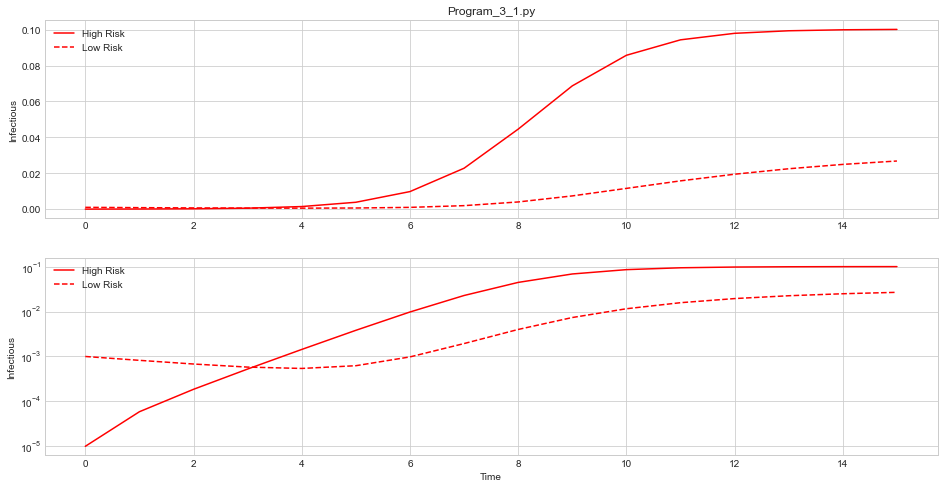

In [3]:
# Parameters
beta=[10., 0.1, 0.1, 1.]
gamma=1.0
nH=0.2
IH=1e-5
IL=1e-3
nT=1.0
nL=nT-nH
SH=nH-IH
SL=nL-IL
ND=15.
TS=1.0

INPUT = (SH,IH,SL,IL)

#Model definition
def diff_eqs(INP,t):
	'''The main set of equations'''
	Y=np.zeros((4))
	V = INP
	Y[0] = - (beta[0] * V[1] + beta[1] * V[3]) * V[0] + gamma * V[1]
	Y[1] = (beta[0] * V[1] + beta[1] * V[3]) * V[0] - gamma * V[1]
	Y[2] = - (beta[2] * V[1] + beta[3] * V[3]) * V[2] + gamma * V[3]
	Y[3] = (beta[2] * V[1] + beta[3] * V[3]) * V[2] - gamma * V[3]
	return Y   # For odeint

#Model Run
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

# Environment preparation
print (RES)

#Ploting
pl.figure(figsize=(16, 8))
pl.subplot(211)
pl.plot(RES[:,1], '-r', label='High Risk')
pl.plot(RES[:,3], '--r', label='Low Risk')
pl.legend(loc=0)
pl.title('Program_3_1.py')
# pl.xlabel('Time')
pl.ylabel('Infectious')
pl.subplot(212)
pl.semilogy(RES[:,1], '-r', label='High Risk')
pl.semilogy(RES[:,3], '--r', label='Low Risk')
pl.legend(loc=0)
pl.xlabel('Time')
pl.ylabel('Infectious')

## Program 3.2: SIS model with n risk groups

Program 3.2 is extending program 3.1, by using multiple groups. Note that we use only one equation (per group) as the S equation is redundant, as for each group S+I=1. 

$$ \frac{dI_{i}}{dt} = \sum_{j}{\beta_{ij} S_{i} I_{j}} - \gamma I_{i} $$

where

- m is teh number of risk groups
- $\beta$ is a matrix with the transmission rates and incorporates the encounter rate between susceptible and infectious individuals together with the probability of transmission.
- $\gamma$ is called the removal or recovery rate, though often we are more interested in its reciprocal (1/γ) which determines the average infectious period.
- nH is the proportion of the population that are in the high risk group

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e-05]
 [0.00000000e+00 2.13340425e-06 1.19286097e-05 1.10103502e-05
  1.50662624e-05]
 [0.00000000e+00 6.62991190e-06 3.70694660e-05 3.42113157e-05
  2.80763687e-05]
 [0.00000000e+00 1.66060167e-05 9.28444502e-05 8.56604139e-05
  5.89930894e-05]
 [0.00000000e+00 3.91515454e-05 2.18876181e-04 2.01804482e-04
  1.30480746e-04]
 [0.00000000e+00 9.03467578e-05 5.04974460e-04 4.64878819e-04
  2.93560720e-04]
 [0.00000000e+00 2.06290415e-04 1.15245949e-03 1.05729781e-03
  6.60510891e-04]
 [0.00000000e+00 4.66007081e-04 2.60056481e-03 2.36748203e-03
  1.46575702e-03]
 [0.00000000e+00 1.03306847e-03 5.75137712e-03 5.14859979e-03
  3.14246539e-03]
 [0.00000000e+00 2.20685368e-03 1.22254700e-02 1.05718383e-02
  6.28002531e-03]
 [0.00000000e+00 4.40813697e-03 2.41913292e-02 1.96179148e-02
  1.11099230e-02]
 [0.00000000e+00 7.95299462e-03 4.29724562e-02 3.14884441e-02
  1.66330099e-02]
 [0.00000000e+00 1.27020933e-02 6.716373

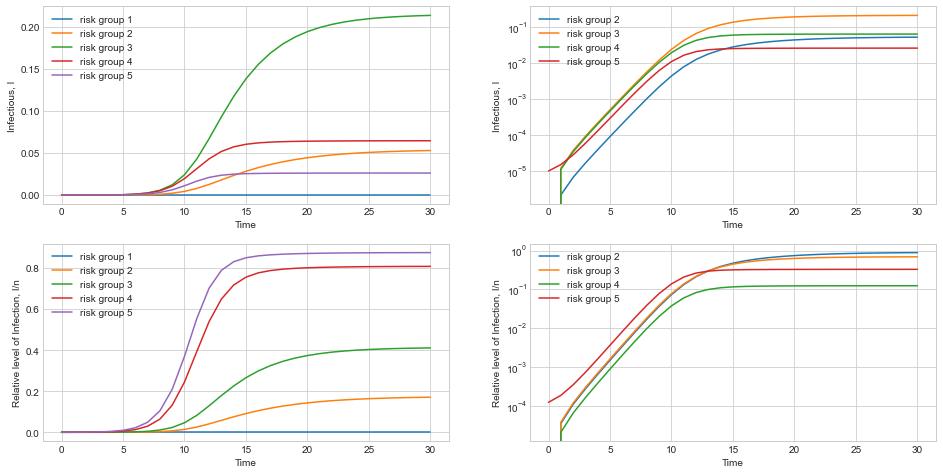

In [4]:
# Parameters
waifw=np.array([0.0, 3.0, 10.0, 60.0, 100.0])
beta=0.0016*np.outer(waifw,waifw)
gamma=0.2*np.array([1.0, 1.0, 1.0, 1.0, 1.0])
n=np.array([0.06, 0.31, 0.52, 0.08, 0.03])
I=np.array([0.0, 0.0, 0.0, 0.0, 1e-5])
ND=30
TS=1.0
m=5
INPUT=I

# Model Defintion
def diff_eqs(INP,t):
	'''The main set of equations'''
	Y=np.zeros((m))
	V = INP
	for i in range(m):
		Y[i] = np.multiply(np.dot(beta[i], V), (n[i]-V[i]))-gamma[i]*V[i]
	return Y   # For odeint

# Model Run
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

# Print Results
print (RES)

#Plotting
pl.figure(figsize=(16, 8))
pl.subplot(221)
for i in range(m):
	pl.plot(RES[:,i], label = 'risk group %s' %(i+1))
pl.ylabel('Infectious, I')
pl.xlabel('Time')
pl.legend(loc=0)
pl.subplot(222)
for i in range(m-1):
	pl.semilogy(RES[:,i+1], label = 'risk group %s' %(i+2))
pl.ylabel('Infectious, I')
pl.xlabel('Time')
pl.legend(loc=0)
pl.subplot(223)
for i in range(m):
	pl.plot(RES[:,i]/n[i], label = 'risk group %s' %(i+1))
pl.ylabel('Relative level of Infection, I/n')
pl.xlabel('Time')
pl.legend(loc=0)
pl.subplot(224)
for i in range(m-1):
	pl.semilogy(RES[:,i+1]/n[i], label = 'risk group %s' %(i+2))
pl.ylabel('Relative level of Infection, I/n')
pl.xlabel('Time')
pl.legend(loc=0)

## Program 3.3: SIR model with children/adult age group


[[1.00000000e-01 1.00000000e-01 1.00000000e-04 1.00000000e-04]
 [1.00088954e-01 1.00047088e-01 1.00904363e-04 9.32576580e-05]
 [1.00177816e-01 1.00094347e-01 1.01753144e-04 8.70450071e-05]
 ...
 [9.75664133e-02 1.94489165e-01 1.00948710e-03 3.20441587e-04]
 [9.75664178e-02 1.94489697e-01 1.00948386e-03 3.20441932e-04]
 [9.75664225e-02 1.94490228e-01 1.00948064e-03 3.20442281e-04]]


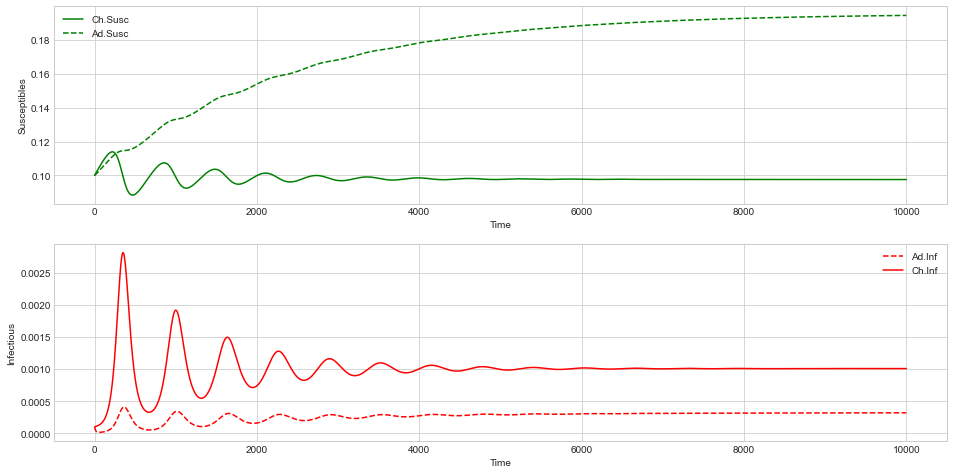

In [5]:
# Parameters
lC=0.066667
mu=[0.0, 0.0166667]
S0=[0.1, 0.1]
I0=[0.0001, 0.0001]
ND=MaxTime=100
beta=np.array([100.0, 10.0, 10.0, 20.0])
gamma=10.0
n0=mu[1]/(lC+mu[1])
n1=1.0-n0
n=np.array([n0,n1])
nu=(lC+mu[1])*n[0]
TS=0.01
INPUT=np.hstack((S0,I0))

# Model Defintion
def diff_eqs(INP,t):
	'''The main set of equations'''
	Y=np.zeros((4))
	V = INP
	Y[0] = nu - (beta[0] * V[2] + beta[2] * V[3]) * V[0] - mu[0] * V[0] - lC * V[0]
	Y[1] = lC * V[0] - (beta[1]*V[2] + beta[3]*V[3]) * V[1] - mu[1] * V[1]
	Y[2] = (beta[0] * V[2] + beta[2] * V[3]) * V[0] - gamma * V[2] - mu[0] * V[2] - lC * V[2]
	Y[3] = (beta[1]*V[2] + beta[3]*V[3]) * V[1] - gamma * V[3] - mu[1] * V[3]
	return Y   # For odeint

# Model Run
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

# Print Results
print (RES)

# Plotting
pl.figure(figsize=(16, 8))
pl.subplot(211)
pl.plot(RES[:,0], 'g-', label='Ch.Susc')
pl.plot(RES[:,1], 'g--', label='Ad.Susc')
pl.ylabel("Susceptibles")
pl.xlabel('Time')
pl.legend(loc=0)
pl.subplot(212)
pl.plot(RES[:,3], 'r--', label='Ad.Inf')
pl.plot(RES[:,2], 'r-', label='Ch.Inf')
pl.ylabel('Infectious')
pl.xlabel('Time')
pl.legend(loc=0)

## Program 3.4: SEIR model with n age groups and yearly aging


[[0.05       0.01       0.01       ... 0.04313333 0.12313333 0.72513333]
 [0.04999644 0.009985   0.00999199 ... 0.04315264 0.12315261 0.72511648]
 [0.04999524 0.00997091 0.00998446 ... 0.04317076 0.12317057 0.72509827]
 ...
 [0.04546192 0.01274401 0.01289004 ... 0.04048977 0.12039431 0.72100166]
 [0.04548529 0.01273674 0.01288631 ... 0.04049752 0.12039825 0.72096808]
 [0.03792391 0.01713191 0.01477672 ... 0.03609813 0.11848826 0.73297472]]


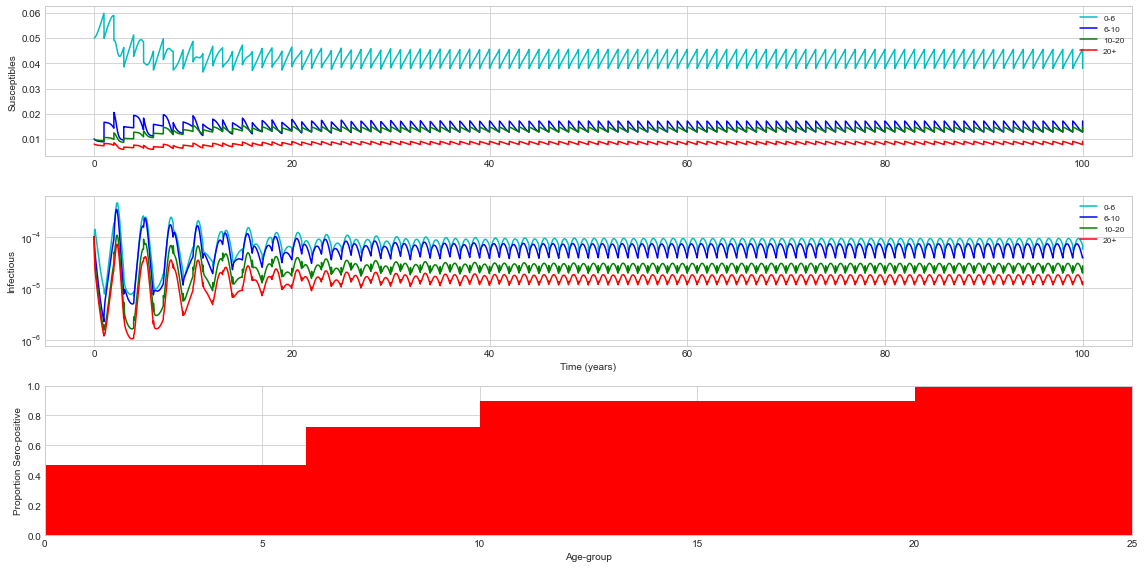

In [6]:
# Parameters
m=4
mu=np.array([0.0,0.0,0.0,1.0/(55*365)])
nu=np.array([1.0/(55*365),0.0,0.0,0.0])
n=np.array([6.0,4.0,10.0,55.0])/75.0
S0=np.array([0.05,0.01,0.01,0.008])
E0=np.array([0.0001,0.0001,0.0001,0.0001])
I0=np.array([0.0001,0.0001,0.0001,0.0001])
R0= np.array([ 0.0298, 0.04313333, 0.12313333, 0.72513333])
ND=MaxTime=365.
beta=np.array(([2.089, 2.089, 2.086, 2.037], [2.089, 9.336, 2.086, 2.037], [2.086, 2.086, 2.086, 2.037], [2.037, 2.037, 2.037, 2.037]))
gamma=1/5.0
sigma=1/8.0
TS=1.0


INPUT=np.hstack((S0,E0,I0,R0))

# Model definition
def diff_eqs(INP,t):
	'''The main set of equations'''
	Y=np.zeros((16))
	V = INP
	for i in range(m):
		Inf = np.dot(beta[i],  V[list(np.array(range(m))+2*m)]) *V[i]
		Y[i] = nu[i]*n[3] - Inf - mu[i] * V[i]
		Y[(m+i)] = Inf - mu[i] * V[(m+i)] - sigma * V[(m+i)]
		Y[(2*m+i)] = sigma * V[(m+i)] - gamma * V[(2*m+i)] - mu[i] * V[(2*m+i)]
		Y[(3*m+i)] = gamma * V[(2*m+i)] - mu[i] * V[(3*m+i)]
	return Y   # For odeint

t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)

RES2=np.zeros((16))
k=1
while k<=100:
	RES = spi.odeint(diff_eqs,INPUT,t_range)
	INPUT=RES[-1]
	INPUT[15]=INPUT[15]+INPUT[14]/10
	INPUT[14]=INPUT[14]+INPUT[13]/4-INPUT[14]/10
	INPUT[13]=INPUT[13]+INPUT[12]/6-INPUT[13]/4
	INPUT[12]=INPUT[12]-INPUT[12]/6

	INPUT[11]=INPUT[11]+INPUT[10]/10
	INPUT[10]=INPUT[10]+INPUT[9]/4-INPUT[10]/10
	INPUT[9]=INPUT[9]+INPUT[8]/6-INPUT[9]/4
	INPUT[8]=INPUT[8]-INPUT[8]/6

	INPUT[7]=INPUT[7]+INPUT[6]/10
	INPUT[6]=INPUT[6]+INPUT[5]/4-INPUT[6]/10
	INPUT[5]=INPUT[5]+INPUT[4]/6-INPUT[5]/4
	INPUT[4]=INPUT[4]-INPUT[4]/6

	INPUT[3]=INPUT[3]+INPUT[2]/10
	INPUT[2]=INPUT[2]+INPUT[1]/4-INPUT[2]/10
	INPUT[1]=INPUT[1]+INPUT[0]/6-INPUT[1]/4
	INPUT[0]=INPUT[0]-INPUT[0]/6
	RES2=np.vstack((RES2,RES))
	k=k+1

RES=RES2[1:,]

# Print Results
print (RES)

Time=np.arange(100*(ND+1))/(ND+1)

##Ploting
pl.figure(figsize=(16,8))
pl.subplot(311)
pl.plot(Time,RES[:,0], 'c', label='0-6')
pl.plot(Time,RES[:,1], 'b', label='6-10')
pl.plot(Time,RES[:,2], 'g', label='10-20')
pl.plot(Time,RES[:,3], 'r', label='20+')
pl.ylabel('Susceptibles')
# pl.xlabel('Time (years)')
pl.legend(loc=1, prop = FontProperties(size='smaller'))


pl.subplot(312)
pl.semilogy(Time,RES[:,0+2*m], 'c', label='0-6')
pl.semilogy(Time,RES[:,1+2*m], 'b', label='6-10')
pl.semilogy(Time,RES[:,2+2*m], 'g', label='10-20')
pl.semilogy(Time,RES[:,3+2*m], 'r', label='20+')
pl.ylabel('Infectious')
pl.xlabel('Time (years)')
pl.legend(loc=1, prop = FontProperties(size='smaller'))

R=np.zeros(4)
pl.subplot(313)
mm=np.where(Time>(ND-365.))
for i in range(4):
	R[i]=1.-np.mean(RES[mm,i])/n[i]

pl.fill(np.array([0, 0, 6, 6,  6, 6, 10, 10, 10, 10, 20, 20, 20, 20, 75, 75]),\
np.array([0, R[0], R[0], 0, 0, R[1], R[1], 0, 0, R[2], R[2], 0, 0, R[3], R[3], 0]),'r')
pl.xlabel('Age-group')
pl.ylabel('Proportion Sero-positive')
pl.xlim((0,25))
pl.ylim((0,1))
pl.tight_layout()

## Program 3.5: SEIR model with multiple E and I classes.


### 3.5_main

[[5.00000000e-02 7.69230769e-07 7.69230769e-07 ... 7.69230769e-07
  7.69230769e-07 7.69230769e-07]
 [5.00466672e-02 6.95893629e-07 7.36998225e-07 ... 7.69192452e-07
  7.69192452e-07 7.69192452e-07]
 [5.00933316e-02 6.68798820e-07 7.02202595e-07 ... 7.69154130e-07
  7.69154079e-07 7.69154137e-07]
 ...
 [5.81795023e-02 5.67057285e-05 5.67660266e-05 ... 5.72725564e-05
  5.73246549e-05 5.73758897e-05]
 [5.81698053e-02 5.66414455e-05 5.67025114e-05 ... 5.72163215e-05
  5.72692705e-05 5.73213630e-05]
 [5.81601742e-02 5.65764137e-05 5.66382394e-05 ... 5.71592534e-05
  5.72130456e-05 5.72659885e-05]]


Text(0.5, 0, 'Time')

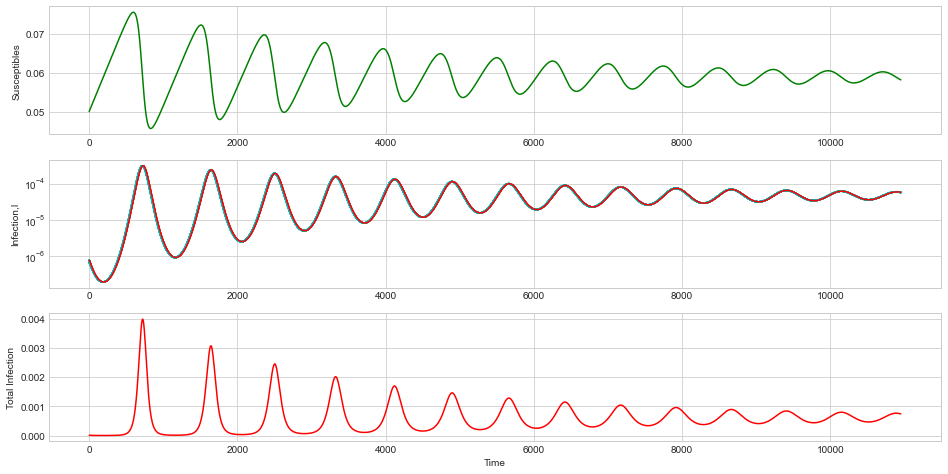

In [7]:
# Parameters
n=13
m=8
gamma=1/13.
beta=17/5.
mu=1./(55*365)
S0=0.05
I0=0.00001
ND=MaxTime=30*365.
TS=1.0
scen="main"


#####################################################################################
### To be compatible with other versions of programs the
### following options are available. To try some of them
### uncomment the code (remove '#'):
#####################################################################################
### As well as the default, you may want to compare the structured model:
# ( n, m, beta, gamma, mu, S0, I0, ND, scen)=(10, 0, 1.0, 0.1, 0.0, 0.5, 1e-6, 60., "a");
### with the unstructured version
# ( n, m, beta, gamma, mu, S0, I0, ND, scen )=(1, 0, 1.0, 0.1, 0.0, 0.5, 1e-6, 60., "b");
### Or compare the SEIR:
# ( n, m, beta, gamma, mu, S0, I0, ND , scen)=(10, 5, 1.0, 0.1, 0.0, 0.5, 1e-4, 150., "c");
### with the unstructured version
# ( n, m, beta, gamma, mu, S0, I0, ND, scen )=(2, 1, 1.0, 0.1, 0.0, 0.5, 1e-4, 150., "d");
#####################################################################################

I0=I0*np.ones((n))/n
INPUT=np.hstack((S0,I0))

# Model Defintion
def diff_eqs(INP,t):
	'''The main set of equations'''
	Y=np.zeros((n+1))
	V = INP
	Y[0] = mu - beta * sum(V[range(m+1,n+1)]) * V[0] - mu * V[0]
	Y[1] = beta * sum(V[range(m+1,n+1)]) * V[0] - gamma*n*V[1] - mu * V[1]
	for i in range(2,n+1):
		Y[i] = gamma*n*V[i-1] - gamma*n*V[i] - mu * V[i]
	return Y   # For odeint

# Model Run
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

#Print Results
print (RES)

REST=np.zeros(len(RES), 'float')
for i in range(1,n+1):
	REST += RES[:,i]

##Ploting
pl.figure(figsize=(16,8))
pl.subplot(311)
pl.plot(RES[:,0], 'g-', label='Susc')
pl.ylabel('Susceptibles')

pl.subplot(312)
if m>0:
	for i in range(1,(n+1-m)):
		for j in range(1,m+1):
			pl.semilogy(RES[:,j],'c', label='Exposed')
		pl.semilogy(RES[:,(i+m)],'r', label='Infectious')
else:
	for i in range(1,n+1):
		pl.semilogy(RES[:,i],'r', label='Infectious')
pl.ylabel('Infection,I')
pl.subplot(313)
if n>1:
	pl.plot(REST, 'r-',label='Infec')
else:
	pl.plot(RES[:,1], 'r-',label='Infec')
pl.ylabel('Total Infection')
pl.xlabel('Time')

### 3.5_a

[[5.00000000e-01 1.00000000e-07 1.00000000e-07 1.00000000e-07
  1.00000000e-07 1.00000000e-07 1.00000000e-07 1.00000000e-07
  1.00000000e-07 1.00000000e-07 1.00000000e-07]
 [4.99999379e-01 4.42869614e-07 2.30494880e-07 1.34241628e-07
  1.10932258e-07 1.01828145e-07 1.00486677e-07 1.00035733e-07
  1.00008677e-07 1.00000002e-07 1.00000000e-07]
 [4.99998420e-01 7.90983123e-07 4.89308236e-07 2.84735824e-07
  1.75577813e-07 1.27487297e-07 1.08748423e-07 1.02539447e-07
  1.00636147e-07 1.00148822e-07 1.00029090e-07]
 [4.99996902e-01 1.28627394e-06 8.51650707e-07 5.40546417e-07
  3.33091313e-07 2.10822730e-07 1.47626707e-07 1.18558448e-07
  1.06610672e-07 1.02151757e-07 1.00646022e-07]
 [4.99994466e-01 2.07270141e-06 1.39603304e-06 9.25795067e-07
  5.98344679e-07 3.79191203e-07 2.43930415e-07 1.68547926e-07
  1.30254321e-07 1.12407781e-07 1.04728946e-07]
 [4.99990510e-01 3.36013405e-06 2.26350677e-06 1.52173311e-06
  1.01242129e-06 6.61139686e-07 4.25348832e-07 2.77229837e-07
  1.91026182e-07

Text(0.5, 0, 'Time')

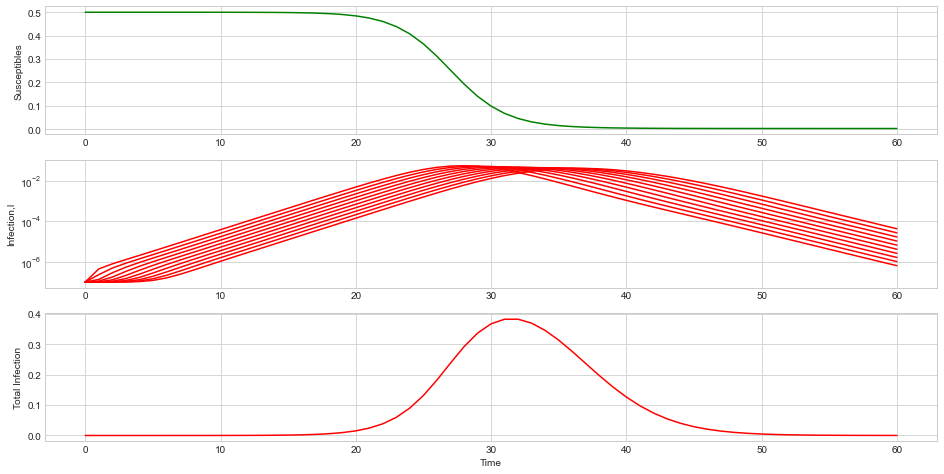

In [8]:
# Parameters
n=13
m=8
gamma=1/13.
beta=17/5.
mu=1./(55*365)
S0=0.05
I0=0.00001
ND=MaxTime=30*365.
TS=1.0
scen="main"


#####################################################################################
### To be compatible with other versions of programs the
### following options are available. To try some of them
### uncomment the code (remove '#'):
#####################################################################################
### As well as the default, you may want to compare the structured model:
( n, m, beta, gamma, mu, S0, I0, ND, scen)=(10, 0, 1.0, 0.1, 0.0, 0.5, 1e-6, 60., "a");
### with the unstructured version
# ( n, m, beta, gamma, mu, S0, I0, ND, scen )=(1, 0, 1.0, 0.1, 0.0, 0.5, 1e-6, 60., "b");
### Or compare the SEIR:
# ( n, m, beta, gamma, mu, S0, I0, ND , scen)=(10, 5, 1.0, 0.1, 0.0, 0.5, 1e-4, 150., "c");
### with the unstructured version
# ( n, m, beta, gamma, mu, S0, I0, ND, scen )=(2, 1, 1.0, 0.1, 0.0, 0.5, 1e-4, 150., "d");
#####################################################################################

I0=I0*np.ones((n))/n
INPUT=np.hstack((S0,I0))

# Model Defintion
def diff_eqs(INP,t):
	'''The main set of equations'''
	Y=np.zeros((n+1))
	V = INP
	Y[0] = mu - beta * sum(V[range(m+1,n+1)]) * V[0] - mu * V[0]
	Y[1] = beta * sum(V[range(m+1,n+1)]) * V[0] - gamma*n*V[1] - mu * V[1]
	for i in range(2,n+1):
		Y[i] = gamma*n*V[i-1] - gamma*n*V[i] - mu * V[i]
	return Y   # For odeint

# Model Run
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

#Print Results
print (RES)

REST=np.zeros(len(RES), 'float')
for i in range(1,n+1):
	REST += RES[:,i]

##Ploting
pl.figure(figsize=(16,8))
pl.subplot(311)
pl.plot(RES[:,0], 'g-', label='Susc')
pl.ylabel('Susceptibles')

pl.subplot(312)
if m>0:
	for i in range(1,(n+1-m)):
		for j in range(1,m+1):
			pl.semilogy(RES[:,j],'c', label='Exposed')
		pl.semilogy(RES[:,(i+m)],'r', label='Infectious')
else:
	for i in range(1,n+1):
		pl.semilogy(RES[:,i],'r', label='Infectious')
pl.ylabel('Infection,I')
pl.subplot(313)
if n>1:
	pl.plot(REST, 'r-',label='Infec')
else:
	pl.plot(RES[:,1], 'r-',label='Infec')
pl.ylabel('Total Infection')
pl.xlabel('Time')

### 3.5_b

[[5.00000000e-01 1.00000000e-06]
 [4.99999380e-01 1.49620574e-06]
 [4.99998453e-01 2.23790031e-06]
 [4.99997073e-01 3.34163970e-06]
 [4.99995020e-01 4.98431569e-06]
 [4.99991947e-01 7.44230984e-06]
 [4.99987356e-01 1.11151667e-05]
 [4.99980520e-01 1.65836445e-05]
 [4.99970312e-01 2.47504722e-05]
 [4.99955084e-01 3.69325459e-05]
 [4.99932357e-01 5.51137483e-05]
 [4.99898468e-01 8.22233785e-05]
 [4.99847907e-01 1.22669736e-04]
 [4.99772505e-01 1.82985483e-04]
 [4.99660052e-01 2.72935140e-04]
 [4.99492445e-01 4.06992640e-04]
 [4.99242612e-01 6.06795345e-04]
 [4.98870427e-01 9.04402576e-04]
 [4.98316372e-01 1.34733430e-03]
 [4.97492371e-01 2.00584062e-03]
 [4.96268784e-01 2.98317357e-03]
 [4.94455943e-01 4.43005034e-03]
 [4.91779030e-01 6.56410458e-03]
 [4.87845642e-01 9.69444384e-03]
 [4.82107643e-01 1.42492694e-02]
 [4.73824584e-01 2.07993010e-02]
 [4.62046948e-01 3.00598694e-02]
 [4.45654418e-01 4.28401288e-02]
 [4.23501954e-01 5.98940253e-02]
 [3.94723337e-01 8.16353453e-02]
 [3.591784

Text(0.5, 0, 'Time')

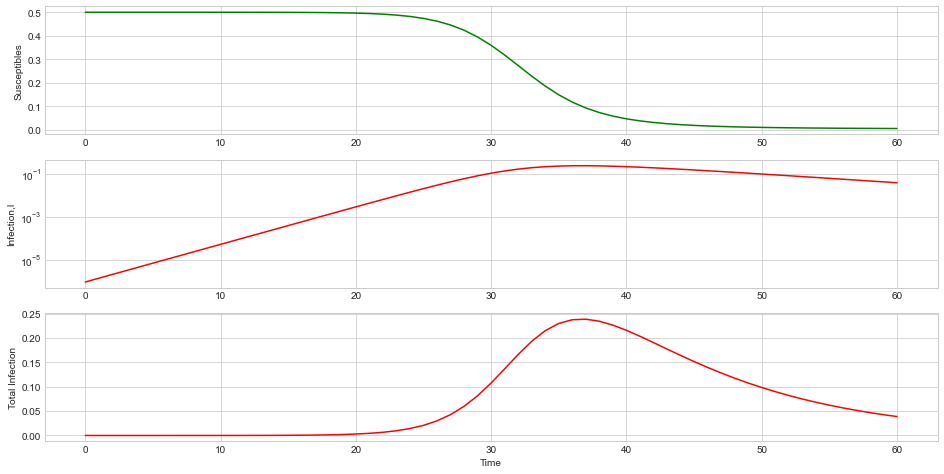

In [9]:
# Parameters
n=13
m=8
gamma=1/13.
beta=17/5.
mu=1./(55*365)
S0=0.05
I0=0.00001
ND=MaxTime=30*365.
TS=1.0
scen="main"


#####################################################################################
### To be compatible with other versions of programs the
### following options are available. To try some of them
### uncomment the code (remove '#'):
#####################################################################################
### As well as the default, you may want to compare the structured model:
# ( n, m, beta, gamma, mu, S0, I0, ND, scen)=(10, 0, 1.0, 0.1, 0.0, 0.5, 1e-6, 60., "a");
### with the unstructured version
( n, m, beta, gamma, mu, S0, I0, ND, scen )=(1, 0, 1.0, 0.1, 0.0, 0.5, 1e-6, 60., "b");
### Or compare the SEIR:
# ( n, m, beta, gamma, mu, S0, I0, ND , scen)=(10, 5, 1.0, 0.1, 0.0, 0.5, 1e-4, 150., "c");
### with the unstructured version
# ( n, m, beta, gamma, mu, S0, I0, ND, scen )=(2, 1, 1.0, 0.1, 0.0, 0.5, 1e-4, 150., "d");
#####################################################################################

I0=I0*np.ones((n))/n
INPUT=np.hstack((S0,I0))

# Model Defintion
def diff_eqs(INP,t):
	'''The main set of equations'''
	Y=np.zeros((n+1))
	V = INP
	Y[0] = mu - beta * sum(V[range(m+1,n+1)]) * V[0] - mu * V[0]
	Y[1] = beta * sum(V[range(m+1,n+1)]) * V[0] - gamma*n*V[1] - mu * V[1]
	for i in range(2,n+1):
		Y[i] = gamma*n*V[i-1] - gamma*n*V[i] - mu * V[i]
	return Y   # For odeint

# Model Run
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

#Print Results
print (RES)

REST=np.zeros(len(RES), 'float')
for i in range(1,n+1):
	REST += RES[:,i]

##Ploting
pl.figure(figsize=(16,8))
pl.subplot(311)
pl.plot(RES[:,0], 'g-', label='Susc')
pl.ylabel('Susceptibles')

pl.subplot(312)
if m>0:
	for i in range(1,(n+1-m)):
		for j in range(1,m+1):
			pl.semilogy(RES[:,j],'c', label='Exposed')
		pl.semilogy(RES[:,(i+m)],'r', label='Infectious')
else:
	for i in range(1,n+1):
		pl.semilogy(RES[:,i],'r', label='Infectious')
pl.ylabel('Infection,I')
pl.subplot(313)
if n>1:
	pl.plot(REST, 'r-',label='Infec')
else:
	pl.plot(RES[:,1], 'r-',label='Infec')
pl.ylabel('Total Infection')
pl.xlabel('Time')

### 3.5_c

[[5.00000000e-01 1.00000000e-05 1.00000000e-05 ... 1.00000000e-05
  1.00000000e-05 1.00000000e-05]
 [4.99975000e-01 1.94814997e-05 1.39656260e-05 ... 1.00001745e-05
  1.00000192e-05 1.00000018e-05]
 [4.99949944e-01 2.30122158e-05 1.89195353e-05 ... 1.00169433e-05
  1.00037565e-05 1.00007532e-05]
 ...
 [5.36502140e-02 3.24788097e-07 3.81581970e-07 ... 1.00342972e-06
  1.18045666e-06 1.38575257e-06]
 [5.36499586e-02 2.80142118e-07 3.29049633e-07 ... 8.64114144e-07
  1.01934120e-06 1.19417806e-06]
 [5.36497433e-02 2.42463524e-07 2.84768695e-07 ... 7.47414468e-07
  8.82633330e-07 1.03322851e-06]]


Text(0.5, 0, 'Time')

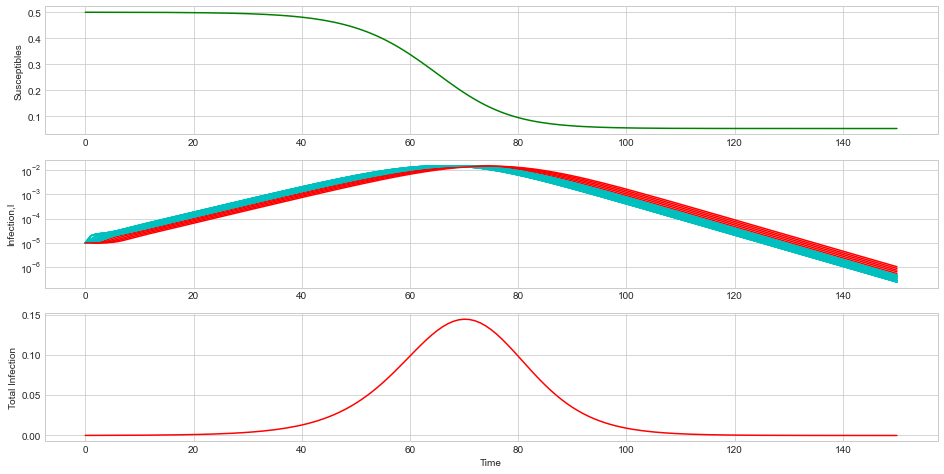

In [10]:
# Parameters
n=13
m=8
gamma=1/13.
beta=17/5.
mu=1./(55*365)
S0=0.05
I0=0.00001
ND=MaxTime=30*365.
TS=1.0
scen="main"


#####################################################################################
### To be compatible with other versions of programs the
### following options are available. To try some of them
### uncomment the code (remove '#'):
#####################################################################################
### As well as the default, you may want to compare the structured model:
# ( n, m, beta, gamma, mu, S0, I0, ND, scen)=(10, 0, 1.0, 0.1, 0.0, 0.5, 1e-6, 60., "a");
### with the unstructured version
# ( n, m, beta, gamma, mu, S0, I0, ND, scen )=(1, 0, 1.0, 0.1, 0.0, 0.5, 1e-6, 60., "b");
### Or compare the SEIR:
( n, m, beta, gamma, mu, S0, I0, ND , scen)=(10, 5, 1.0, 0.1, 0.0, 0.5, 1e-4, 150., "c");
### with the unstructured version
# ( n, m, beta, gamma, mu, S0, I0, ND, scen )=(2, 1, 1.0, 0.1, 0.0, 0.5, 1e-4, 150., "d");
#####################################################################################

I0=I0*np.ones((n))/n
INPUT=np.hstack((S0,I0))

# Model Defintion
def diff_eqs(INP,t):
	'''The main set of equations'''
	Y=np.zeros((n+1))
	V = INP
	Y[0] = mu - beta * sum(V[range(m+1,n+1)]) * V[0] - mu * V[0]
	Y[1] = beta * sum(V[range(m+1,n+1)]) * V[0] - gamma*n*V[1] - mu * V[1]
	for i in range(2,n+1):
		Y[i] = gamma*n*V[i-1] - gamma*n*V[i] - mu * V[i]
	return Y   # For odeint

# Model Run
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

#Print Results
print (RES)

REST=np.zeros(len(RES), 'float')
for i in range(1,n+1):
	REST += RES[:,i]

##Ploting
pl.figure(figsize=(16,8))
pl.subplot(311)
pl.plot(RES[:,0], 'g-', label='Susc')
pl.ylabel('Susceptibles')

pl.subplot(312)
if m>0:
	for i in range(1,(n+1-m)):
		for j in range(1,m+1):
			pl.semilogy(RES[:,j],'c', label='Exposed')
		pl.semilogy(RES[:,(i+m)],'r', label='Infectious')
else:
	for i in range(1,n+1):
		pl.semilogy(RES[:,i],'r', label='Infectious')
pl.ylabel('Infection,I')
pl.subplot(313)
if n>1:
	pl.plot(REST, 'r-',label='Infec')
else:
	pl.plot(RES[:,1], 'r-',label='Infec')
pl.ylabel('Total Infection')
pl.xlabel('Time')

### 3.5_d

[[5.00000000e-01 5.00000000e-05 5.00000000e-05]
 [4.99974766e-01 6.38201219e-05 5.13201974e-05]
 [4.99948328e-01 7.62358312e-05 5.47661244e-05]
 [4.99919751e-01 8.83555082e-05 5.97913047e-05]
 [4.99888329e-01 1.00864442e-04 6.61333996e-05]
 [4.99853433e-01 1.14264525e-04 7.36668307e-05]
 [4.99814481e-01 1.28922223e-04 8.23753828e-05]
 [4.99770878e-01 1.45145995e-04 9.23060379e-05]
 [4.99721995e-01 1.63225142e-04 1.03547103e-04]
 [4.99667146e-01 1.83443778e-04 1.16224206e-04]
 [4.99605579e-01 2.06098117e-04 1.30492028e-04]
 [4.99536457e-01 2.31506452e-04 1.46533152e-04]
 [4.99458846e-01 2.60017485e-04 1.64557425e-04]
 [4.99371702e-01 2.92017317e-04 1.84803289e-04]
 [4.99273855e-01 3.27936012e-04 2.07540025e-04]
 [4.99163995e-01 3.68253026e-04 2.33069980e-04]
 [4.99040654e-01 4.13505162e-04 2.61733423e-04]
 [4.98902185e-01 4.64293463e-04 2.93912579e-04]
 [4.98746736e-01 5.21291960e-04 3.30037061e-04]
 [4.98572240e-01 5.85252793e-04 3.70585881e-04]
 [4.98376383e-01 6.57017272e-04 4.160960

Text(0.5, 0, 'Time')

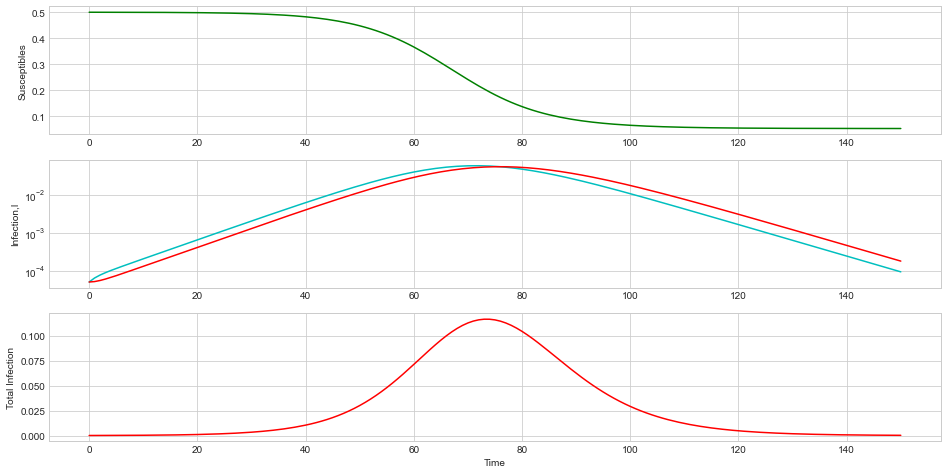

In [11]:
# Parameters
n=13
m=8
gamma=1/13.
beta=17/5.
mu=1./(55*365)
S0=0.05
I0=0.00001
ND=MaxTime=30*365.
TS=1.0
scen="main"


#####################################################################################
### To be compatible with other versions of programs the
### following options are available. To try some of them
### uncomment the code (remove '#'):
#####################################################################################
### As well as the default, you may want to compare the structured model:
# ( n, m, beta, gamma, mu, S0, I0, ND, scen)=(10, 0, 1.0, 0.1, 0.0, 0.5, 1e-6, 60., "a");
### with the unstructured version
# ( n, m, beta, gamma, mu, S0, I0, ND, scen )=(1, 0, 1.0, 0.1, 0.0, 0.5, 1e-6, 60., "b");
### Or compare the SEIR:
# ( n, m, beta, gamma, mu, S0, I0, ND , scen)=(10, 5, 1.0, 0.1, 0.0, 0.5, 1e-4, 150., "c");
### with the unstructured version
( n, m, beta, gamma, mu, S0, I0, ND, scen )=(2, 1, 1.0, 0.1, 0.0, 0.5, 1e-4, 150., "d");
#####################################################################################

I0=I0*np.ones((n))/n
INPUT=np.hstack((S0,I0))

# Model Defintion
def diff_eqs(INP,t):
	'''The main set of equations'''
	Y=np.zeros((n+1))
	V = INP
	Y[0] = mu - beta * sum(V[range(m+1,n+1)]) * V[0] - mu * V[0]
	Y[1] = beta * sum(V[range(m+1,n+1)]) * V[0] - gamma*n*V[1] - mu * V[1]
	for i in range(2,n+1):
		Y[i] = gamma*n*V[i-1] - gamma*n*V[i] - mu * V[i]
	return Y   # For odeint

# Model Run
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

#Print Results
print (RES)

REST=np.zeros(len(RES), 'float')
for i in range(1,n+1):
	REST += RES[:,i]

##Ploting
pl.figure(figsize=(16,8))
pl.subplot(311)
pl.plot(RES[:,0], 'g-', label='Susc')
pl.ylabel('Susceptibles')

pl.subplot(312)
if m>0:
	for i in range(1,(n+1-m)):
		for j in range(1,m+1):
			pl.semilogy(RES[:,j],'c', label='Exposed')
		pl.semilogy(RES[:,(i+m)],'r', label='Infectious')
else:
	for i in range(1,n+1):
		pl.semilogy(RES[:,i],'r', label='Infectious')
pl.ylabel('Infection,I')
pl.subplot(313)
if n>1:
	pl.plot(REST, 'r-',label='Infec')
else:
	pl.plot(RES[:,1], 'r-',label='Infec')
pl.ylabel('Total Infection')
pl.xlabel('Time')